<a href="https://colab.research.google.com/github/Rajaonah01/TeamASH/blob/main/Partie_C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Valeurs nulles :
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Valeurs manquantes après remplacement des 0 :
Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


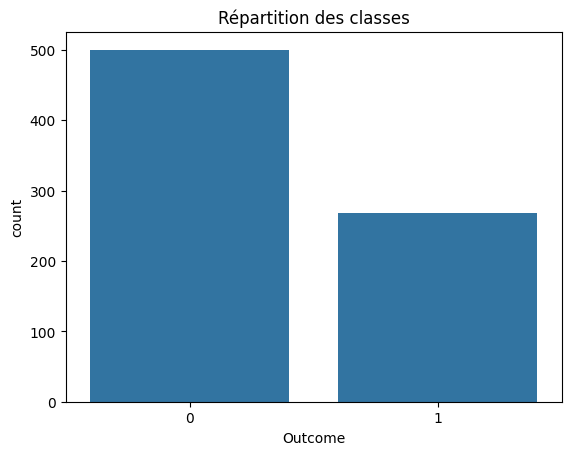


Statistiques par classe :
         Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
Outcome                                                                      
0           3.298000  110.682000      70.920000      27.726000  127.792000   
1           4.865672  142.130597      75.123134      31.686567  164.701493   

               BMI  DiabetesPedigreeFunction        Age  
Outcome                                                  
0        30.885600                  0.429734  31.190000  
1        35.383582                  0.550500  37.067164  

Évaluation sur validation :
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       100
           1       0.73      0.59      0.65        54

    accuracy                           0.78       154
   macro avg       0.76      0.74      0.75       154
weighted avg       0.77      0.78      0.77       154


Évaluation finale sur test set :
              precision    recall  f1-

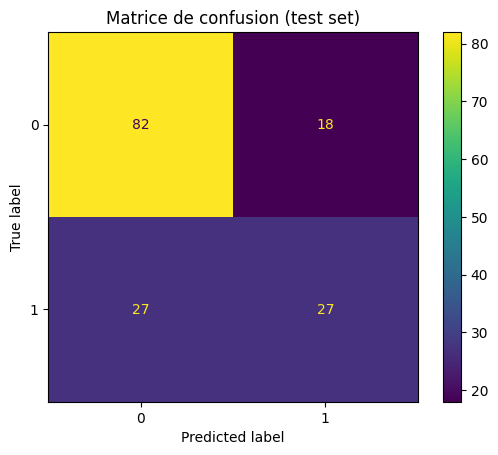

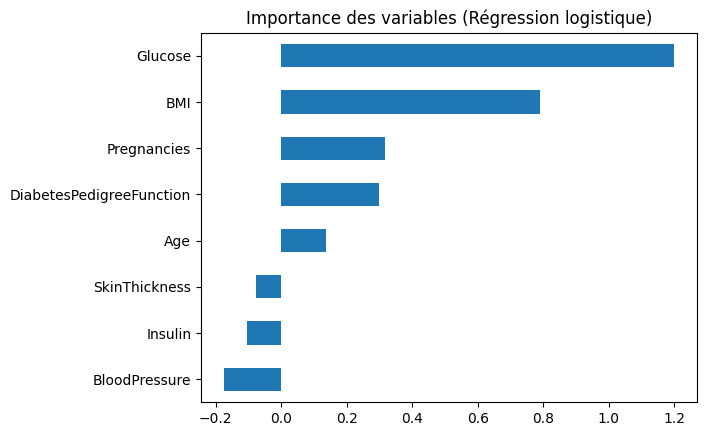

Faux positifs : 18 | Faux négatifs : 27

Conclusion :
Le modèle de régression logistique donne des résultats corrects avec un bon équilibre entre précision et rappel. Les variables les plus influentes sont la glycémie (Glucose), le BMI et l'âge. Des modèles plus avancés (forêts, XGBoost) ou des techniques de rééquilibrage (SMOTE) pourraient améliorer la performance.


In [2]:
# Partie C : Classification - Diabète (Pima Indians)

# 1. Chargement des bibliothèques
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# Chargement des données
df = pd.read_csv("diabetes.csv")
df.head()

# 2. Nettoyage et prétraitement
print("Valeurs nulles :")
print(df.isnull().sum())

# Certains 0 sont à traiter comme manquants (Glucose, BP, etc.)
cols_with_zero = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
df[cols_with_zero] = df[cols_with_zero].replace(0, np.nan)
print("\nValeurs manquantes après remplacement des 0 :")
print(df.isnull().sum())

# Imputation par médiane
df.fillna(df.median(), inplace=True)

# 3. EDA et équilibre des classes
sns.countplot(x="Outcome", data=df)
plt.title("Répartition des classes")
plt.show()

print("\nStatistiques par classe :")
print(df.groupby("Outcome").mean())

# 4. Split train/val/test
train_val, test = train_test_split(df, test_size=0.2, random_state=42, stratify=df["Outcome"])
train, val = train_test_split(train_val, test_size=0.25, random_state=42, stratify=train_val["Outcome"])

X_train = train.drop("Outcome", axis=1)
y_train = train["Outcome"]
X_val = val.drop("Outcome", axis=1)
y_val = val["Outcome"]
X_test = test.drop("Outcome", axis=1)
y_test = test["Outcome"]

# 5. Standardisation
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# 6. Modélisation : Régression logistique
model = LogisticRegression()
model.fit(X_train_scaled, y_train)
y_pred_val = model.predict(X_val_scaled)

print("\nÉvaluation sur validation :")
print(classification_report(y_val, y_pred_val))

# 7. Évaluation finale : matrice de confusion
y_pred_test = model.predict(X_test_scaled)
print("\nÉvaluation finale sur test set :")
print(classification_report(y_test, y_pred_test))

cm = confusion_matrix(y_test, y_pred_test)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.title("Matrice de confusion (test set)")
plt.show()

# 8. Importance des features
coef = pd.Series(model.coef_[0], index=X_train.columns)
coef.sort_values().plot(kind='barh', title="Importance des variables (Régression logistique)")
plt.show()

# 9. Analyse d'erreurs (faux positifs/négatifs)
fp = np.where((y_test == 0) & (y_pred_test == 1))[0]
fn = np.where((y_test == 1) & (y_pred_test == 0))[0]
print(f"Faux positifs : {len(fp)} | Faux négatifs : {len(fn)}")

# 10. Conclusion
print("\nConclusion :")
print("Le modèle de régression logistique donne des résultats corrects avec un bon équilibre entre précision et rappel. Les variables les plus influentes sont la glycémie (Glucose), le BMI et l'âge. Des modèles plus avancés (forêts, XGBoost) ou des techniques de rééquilibrage (SMOTE) pourraient améliorer la performance.")
